# **Домашнее задание 3**

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display
import matplotlib.pyplot as plt

Вспомогательные функции

In [2]:
def Rx(q):
    T = np.array([[1,         0,          0, 0],
                  [0, np.cos(q), -np.sin(q), 0],
                  [0, np.sin(q),  np.cos(q), 0],
                  [0,         0,          0, 1]], dtype=float)
    return T


def Ry(q):
    T = np.array([[ np.cos(q), 0, np.sin(q), 0],
                  [         0, 1,         0, 0],
                  [-np.sin(q), 0, np.cos(q), 0],
                  [         0, 0,         0, 1]], dtype=float)
    return T


def Rz(q):
    T = np.array([[np.cos(q), -np.sin(q), 0, 0],
                  [np.sin(q),  np.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]], dtype=float)
    return T


def Tx(x):
    T = np.array([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]], dtype=float)
    return T


def Ty(y):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]], dtype=float)
    return T


def Tz(z):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]], dtype=float)
    return T

def dRz(theta):
    return np.array([
        [-np.sin(theta), -np.cos(theta), 0, 0],
        [ np.cos(theta), -np.sin(theta), 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ])

def dRy(theta):
    return np.array([
        [-np.sin(theta), 0, np.cos(theta), 0],
        [0, 0, 0, 0],
        [-np.cos(theta), 0, -np.sin(theta), 0],
        [0, 0, 0, 0]
    ])

Символьные они

In [3]:
def Rx_sym(q):
    T = sym.Matrix([[1,         0,          0, 0],
                  [0, sym.cos(q), -sym.sin(q), 0],
                  [0, sym.sin(q),  sym.cos(q), 0],
                  [0,         0,          0, 1]])
    return T

def Ry_sym(q):
    T = sym.Matrix([[ sym.cos(q), 0, sym.sin(q), 0],
                  [         0, 1,         0, 0],
                  [-sym.sin(q), 0, sym.cos(q), 0],
                  [         0, 0,         0, 1]])
    return T


def Rz_sym(q):
    T = sym.Matrix([[sym.cos(q), -sym.sin(q), 0, 0],
                  [sym.sin(q),  sym.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]])
    return T


def Tx_sym(x):
    T = sym.Matrix([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


def Ty_sym(y):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


def Tz_sym(z):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]])
    return T


def dRz(q):
    T = np.array([[-np.sin(q), -np.cos(q), 0, 0],
                  [np.cos(q),  -np.sin(q), 0, 0],
                  [        0,          0, 0, 0],
                  [        0,          0, 0, 0]], dtype=float)
    return T

def dRx(q):
    T = np.array([[0,         0,          0, 0],
                  [0, -np.sin(q), -np.cos(q), 0],
                  [0, np.cos(q),  -np.sin(q), 0],
                  [0,         0,          0, 0]], dtype=float)
    return T

def dRy(q):
    T = np.array([[ -np.sin(q), 0, np.cos(q), 0],
                  [         0, 0,         0, 0],
                  [-np.cos(q), 0, -np.sin(q), 0],
                  [         0, 0,         0, 0]], dtype=float)
    return T

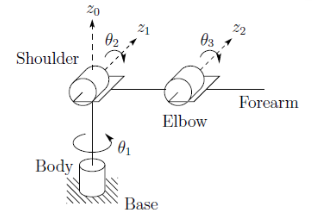

**Задание 1.** Вычислить  матрицу Якоби (классический способ, геометрический, численный) для трехзвенного манипулятора выше. Длины звенеьв можно считать равными $l_1=l_2=l_3=1$.

In [4]:
params = {'l1': 1,
          'l2': 1,
          'l3': 1}
gen_coords = {'q1': 10,
              'q2': 10,
              'q3': 0}

### Классический способ

In [5]:
def j_sym_analytic():
	"""
	The function returns the Jacobian (6x3) in symbolic form
	"""
	x,y, z,phi, theta, psi,q1,q2,q3 = sym.symbols('x,y, z, varphi, vartheta, varpsi, q_1, q_2, q_3')
	l1,l2,l3 = sym.symbols('l_1, l_2, l_3')

	T = Rz_sym(q1)@Tz_sym(l1)@Ry_sym(q2)@Tx_sym(l2)@Ry_sym(q3)@Tx_sym(l3)

	x, y, z = T[:3, 3]
	psi = sym.atan2(T[1, 0], T[0, 0])
	theta = sym.atan2(-T[2, 0], sym.sqrt(T[0, 0]**2 + T[1, 0]**2))
	phi = sym.atan2(T[2, 1], T[2, 2])

	pos = sym.Matrix([x,y,z,phi, theta, psi])
	q = sym.Matrix([q1,q2,q3])

	J = pos.jacobian(q)
	J_sym = sym.simplify(sym.trigsimp(J))
	J_func = sym.lambdify((q1, q2, q3, l1, l2, l3), J_sym, 'numpy')
	return J_sym, J_func

In [6]:
J_cl_sym, J_cl_num = j_sym_analytic()
J_cl_num = J_cl_num(
    gen_coords['q1'], gen_coords['q2'], gen_coords['q3'],
    params['l1'], params['l2'], params['l3']
)

In [7]:
display(J_cl_sym)
print(J_cl_num)

Matrix([
[-(l_2*cos(q_2) + l_3*cos(q_2 + q_3))*sin(q_1),       -(l_2*sin(q_2) + l_3*sin(q_2 + q_3))*cos(q_1),                        -l_3*sin(q_2 + q_3)*cos(q_1)],
[ (l_2*cos(q_2) + l_3*cos(q_2 + q_3))*cos(q_1),       -(l_2*sin(q_2) + l_3*sin(q_2 + q_3))*sin(q_1),                        -l_3*sin(q_1)*sin(q_2 + q_3)],
[                                            0,                  -l_2*cos(q_2) - l_3*cos(q_2 + q_3),                                 -l_3*cos(q_2 + q_3)],
[                                            0,                                                   0,                                                   0],
[                                            0, sqrt(2)*cos(q_2 + q_3)/sqrt(cos(2*q_2 + 2*q_3) + 1), sqrt(2)*cos(q_2 + q_3)/sqrt(cos(2*q_2 + 2*q_3) + 1)],
[                                            1,                                                   0,                                                   0]])

[[-0.91294525 -0.91294525 -0.45647263]
 [ 1.40808206 -0.59191794 -0.29595897]
 [ 0.          1.67814306  0.83907153]
 [ 0.          0.          0.        ]
 [ 0.         -1.         -1.        ]
 [ 1.          0.          0.        ]]


Матрица Якобиан представлена сверху в виде символьного представления

### Геометрический способ

In [8]:
def get_points(general_coordinates, robot_params):
	"""
	Returns x and y coordinates of all joints
	"""
	q1, q2, q3 = general_coordinates['q1'], general_coordinates['q2'], general_coordinates['q3']
	l1, l2, l3 = robot_params['l1'], robot_params['l2'], robot_params['l3']

	T01 = Rz(q1)@Tz(l1)
	T02 = T01@Ry(q2)@Tx(l2)
	T03 = T02@Ry(q3)@Tx(l3)

	joint0_x = joint0_y = joint0_z = 0
	joint1_x, joint1_y, joint1_z = (T01)[:3, 3]
	joint2_x, joint2_y, joint2_z = (T02)[:3, 3]
	joint3_x, joint3_y, joint3_z = (T03)[:3, 3]

	points = np.array([[joint0_x, joint1_x, joint2_x, joint3_x],
					   [joint0_y, joint1_y, joint2_y, joint3_y],
					   [joint0_z, joint1_z, joint2_z, joint3_z]])

	return points, T01, T02

def j_gm(points, T01, T02):
    """
    The function returns the Jacobian (6x3) calculated geometrically
    """
    xs, ys, zs = points[0, :], points[1, :], points[2, :]
    pe = np.array([xs[-1], ys[-1], zs[-1]])

    z0 = np.array([0, 0, 1])    # первый сустав (Rz)
    z1 = T01[:3, 1]             # второй сустав (Ry в рамке 1)
    z2 = T02[:3, 1]             # третий сустав (Ry в рамке 2)
    z = np.array([z0, z1, z2])

    J = np.zeros((6, 3))

    for i in range(3):
        pi = np.array([xs[i], ys[i], zs[i]])
        zi = z[i]
        Jp = np.cross(zi, (pe - pi))
        J[0:3, i] = Jp
        J[3:,  i] = zi

    return J

In [9]:
points, T01, T02 = get_points(gen_coords, params)
J_gm = j_gm(points, T01, T02)
print(J_gm)

[[-0.91294525 -0.91294525 -0.45647263]
 [ 1.40808206 -0.59191794 -0.29595897]
 [ 0.          1.67814306  0.83907153]
 [ 0.          0.54402111  0.54402111]
 [ 0.         -0.83907153 -0.83907153]
 [ 1.          0.          0.        ]]


### Численный способ

In [10]:
def j_numerical_derivatives(general_coordinates, robot_params):
    """
    Якобиан (6x3) для сферического манипулятора (Base-Shoulder-Elbow)
    """
    q1, q2, q3 = general_coordinates['q1'], general_coordinates['q2'], general_coordinates['q3']
    l1, l2, l3 = robot_params['l1'], robot_params['l2'], robot_params['l3']

    # forward kinematics
    H = Rz(q1)@Tz(l1)@Ry(q2)@Tx(l2)@Ry(q3)@Tx(l3)
    R = H[:3, :3]
    R_inv = R.T

    Hee_transposed = np.eye(4)
    Hee_transposed[:3, :3] = R_inv

    H1 = dRz(q1) @ Tz(l1) @ Ry(q2) @ Tx(l2) @ Ry(q3) @ Tx(l3) @ Hee_transposed
    J1 = np.array([H1[0,3], H1[1,3], H1[2,3], H1[2,1], H1[0,2], H1[1,0]]).reshape((6,1))

    H2 = Rz(q1) @ Tz(l1) @ dRy(q2) @ Tx(l2) @ Ry(q3) @ Tx(l3) @ Hee_transposed
    J2 = np.array([H2[0,3], H2[1,3], H2[2,3], H2[2,1], H2[0,2], H2[1,0]]).reshape((6,1))

    H3 = Rz(q1) @ Tz(l1) @ Ry(q2) @ Tx(l2) @ dRy(q3) @ Tx(l3) @ Hee_transposed
    J3 = np.array([H3[0,3], H3[1,3], H3[2,3], H3[2,1], H3[0,2], H3[1,0]]).reshape((6,1))

    J = np.hstack([J1, J2, J3])
    return J

In [11]:
J_numeric = j_numerical_derivatives(gen_coords, params)
print(J_numeric)

[[-9.12945251e-01 -9.12945251e-01 -4.56472625e-01]
 [ 1.40808206e+00 -5.91917938e-01 -2.95958969e-01]
 [ 0.00000000e+00  1.67814306e+00  8.39071529e-01]
 [ 0.00000000e+00  5.44021111e-01  5.44021111e-01]
 [ 2.92725831e-17 -8.39071529e-01 -8.39071529e-01]
 [ 1.00000000e+00 -3.60877313e-17 -3.60877313e-17]]


Как видим - значения совпадают

**Задание 2.** Построить траекторию при $\mathbf{q}(0)= [0^∘,0^∘,0^∘]$, $\mathbf{q}(2)= [30^∘,90^∘,180^∘]$ при нулевых начальных и конечных угловых скоростях и угловых ускорениях. Построить графики положения, скорости и ускорений шарниров.

In [12]:
def calculate_coefficients(t0, tf, q0, qf, dq0, dqf, ddq0, ddqf):
	"""
	Calculate coefficients of quintick polynomial
	"""
	T = np.array([[1, t0, t0**2, t0**3, t0**4, t0**5],
			   	  [1, tf, tf**2, tf**3, tf**4, tf**5],
				  [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
				  [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4],
				  [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
				  [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]])
	x = np.array([q0, qf, dq0, dqf, ddq0, ddqf]).reshape((6,1))
	a_arr = np.linalg.inv(T)  @ x
	return a_arr

In [13]:
t0 = 0.0
tf = 10.0
q0 = np.deg2rad([0, 0, 0])          # начальные углы (в радианах)
qf = np.deg2rad([30, 90, 180])      # конечные углы (в радианах)
dq0 = [0, 0, 0]                     # начальные скорости
dqf = [0, 0, 0]                     # конечные скорости
ddq0 = [0, 0, 0]                    # начальные ускорения
ddqf = [0, 0, 0]                    # конечные ускорения

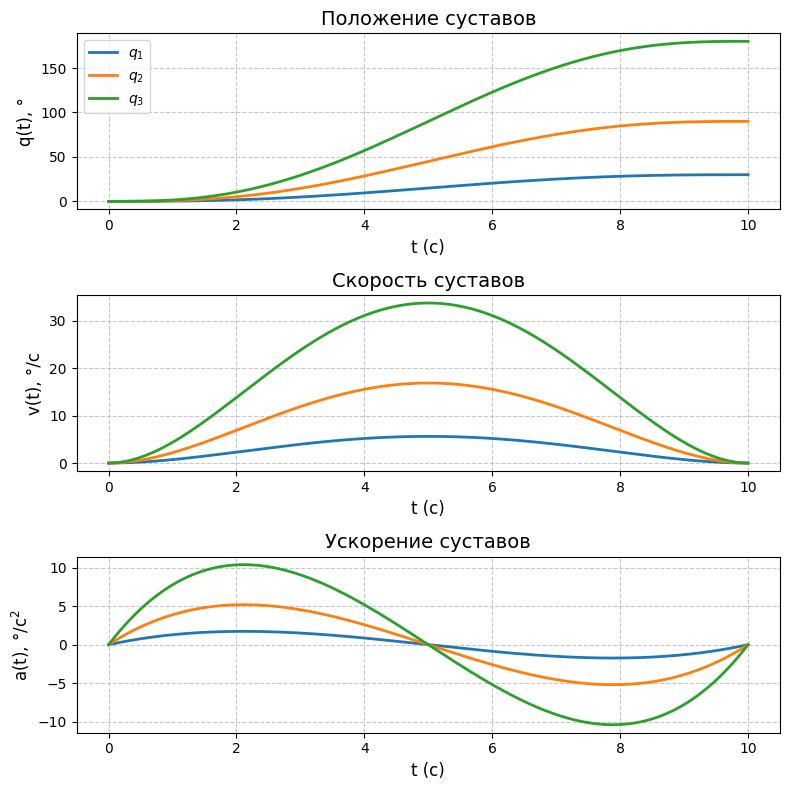

In [14]:
t = np.linspace(t0, tf, 1000)
q_all, v_all, a_all = [], [], []

for i in range(3):
    a_arr = calculate_coefficients(t0, tf, q0[i], qf[i], dq0[i], dqf[i], ddq0[i], ddqf[i])
    q = (a_arr[0] + a_arr[1]*t + a_arr[2]*t**2 + a_arr[3]*t**3 +
         a_arr[4]*t**4 + a_arr[5]*t**5)
    v = (a_arr[1] + 2*a_arr[2]*t + 3*a_arr[3]*t**2 +
         4*a_arr[4]*t**3 + 5*a_arr[5]*t**4)
    a = (2*a_arr[2] + 6*a_arr[3]*t + 12*a_arr[4]*t**2 + 20*a_arr[5]*t**3)
    q_all.append(np.rad2deg(q))
    v_all.append(np.rad2deg(v))
    a_all.append(np.rad2deg(a))

# --- Построение графиков ---
plt.figure(figsize=(8, 8))
titles = [r'$q_1$', r'$q_2$', r'$q_3$']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Положение
plt.subplot(3, 1, 1)
for i in range(3):
    plt.plot(t, q_all[i], linewidth=2, label=titles[i], color=colors[i])
plt.xlabel('t (с)', fontsize=12)
plt.ylabel(r'q(t), °', fontsize=12)
plt.title('Положение суставов', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Скорость
plt.subplot(3, 1, 2)
for i in range(3):
    plt.plot(t, v_all[i], linewidth=2, label=titles[i], color=colors[i])
plt.xlabel('t (с)', fontsize=12)
plt.ylabel(r'v(t), °/с', fontsize=12)
plt.title('Скорость суставов', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Ускорение
plt.subplot(3, 1, 3)
for i in range(3):
    plt.plot(t, a_all[i], linewidth=2, label=titles[i], color=colors[i])
plt.xlabel('t (с)', fontsize=12)
plt.ylabel(r'a(t), °/с$^2$', fontsize=12)
plt.title('Ускорение суставов', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Как видим, все условия соблюдены

**Задание 3.** При заданных начальных условиях
\begin{array}{|c|c|c|c|}
\hline
& \text{joint 1} & \text{joint 2} & \text{joint 3} \\
\hline
\text{начальное положение, $^\circ$} & 0 & 0 & 0\\
\hline
\text{конечное положение, $^\circ$} & 90 & 30 & 60 \\
\hline
\text{максимальная скорость, $^\circ$/c} & 5 & 4 & 3\\
\hline
\text{максимальное ускорение, $^\circ$/c$^2$} & 2 & 4 & 1\\
\hline
\end{array}

найти траекторию всех шарниров с минимальным затраченным временем. Выполнить синхронизацию движения всех трех шарниров. Построить графики положения, скорости и ускорения до и после синхронизации.

In [15]:
t0 = 0.0
q0 = np.deg2rad([0, 0, 0])          # начальные углы (в радианах)
qf = np.deg2rad([90, 30, 60])      # конечные углы (в радианах)
dq_max = np.deg2rad([5, 4, 3])	# макс. скорости (в радианах)
ddq_max = np.deg2rad([2, 4, 1])	# макс. ускорения (в радианах)

вспомогательные функции для красоты

In [16]:
def time_params(params, t0 = 0):
  q0, qf, dq_max, ddq_max = params
  delta_q = abs(qf - q0)
  if np.sqrt(delta_q * ddq_max) <= dq_max:
    t1 = np.sqrt(delta_q / ddq_max)
    T = t1
    tf = 2*t1
    # print(f'Triangle profile, minimum time: {tf} seconds.')
  else:
    t1 = dq_max / ddq_max
    T = delta_q / dq_max
    tf = t1 + T
    # print(f'Trapezoidal profile, minimum time: {tf} seconds.')
  return t0, t1, T, tf

def universal_profile(q0, qf, dq_max, ddq_max, t0, t1, T, tf, n=3000):
    t = np.linspace(t0, tf, n)

    q = np.zeros_like(t)
    v = np.zeros_like(t)
    a = np.zeros_like(t)

    m1, m2, m3 = t <= t1, (t > t1) & (t <= T), t > T

    q[m1], v[m1], a[m1] = q0 + 0.5 * ddq_max * (t[m1]-t0)**2, ddq_max*(t[m1]-t0), ddq_max
    q[m2], v[m2], a[m2] = q0 + 0.5*ddq_max*t1**2 + dq_max*(t[m2]-t1), dq_max, 0
    q[m3], v[m3], a[m3] = qf - 0.5*ddq_max*(tf-t[m3])**2, ddq_max*(tf-t[m3]), -ddq_max

    return t, q, v, a

def plan_trajectory(q_params, t_params):
    t0, t1, T, tf = t_params
    q0, qf, dq_max, ddq_max = q_params

    t, q, v, a = universal_profile(q0, qf, dq_max, ddq_max, t0, t1, T, tf, 1000)
    return t, q, v, a

Смотрим на время движения каждого шарнира и профили

In [17]:
trajectories = []
time_params_all = []

for i in range(len(q0)):
    q_params = [q0[i], qf[i], dq_max[i], ddq_max[i]]
    t_params = time_params(q_params)
    t, q, v, a = plan_trajectory(q_params, t_params)

    trajectories.append((t, q, v, a))
    time_params_all.append(t_params)

    t0_i, t1_i, T_i, tf_i = t_params
    profile_type = "Triangle" if np.sqrt(abs(qf[i]-q0[i]) * ddq_max[i]) <= dq_max[i] else "Trapezoid"
    print(f"Joint {i+1}: {profile_type} profile")
    print(f"  t0 = {t0_i:.3f} s | t1 = {t1_i:.3f} s | T = {T_i:.3f} s | tf = {tf_i:.3f} s\n")

Joint 1: Trapezoid profile
  t0 = 0.000 s | t1 = 2.500 s | T = 18.000 s | tf = 20.500 s

Joint 2: Trapezoid profile
  t0 = 0.000 s | t1 = 1.000 s | T = 7.500 s | tf = 8.500 s

Joint 3: Trapezoid profile
  t0 = 0.000 s | t1 = 3.000 s | T = 20.000 s | tf = 23.000 s



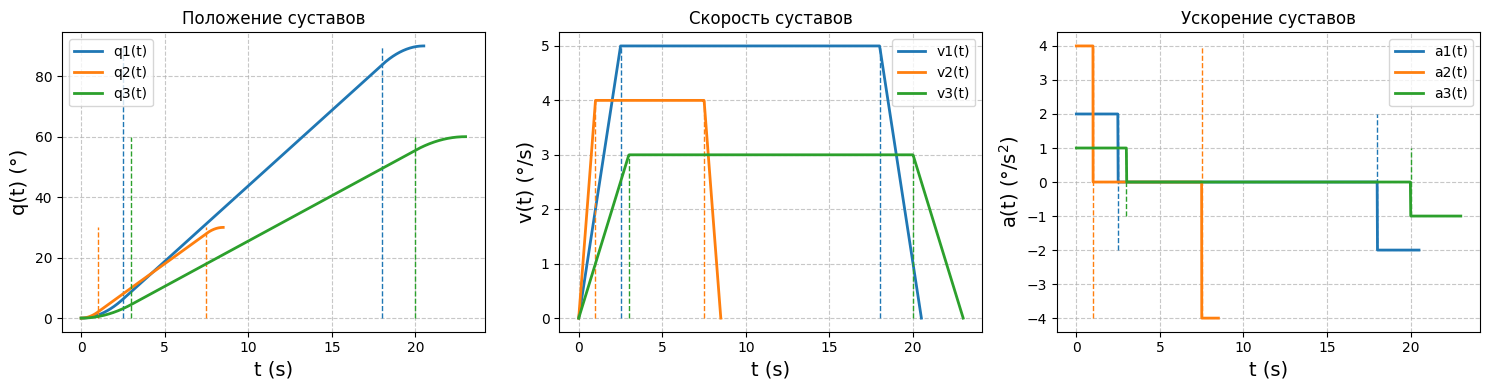

In [18]:
# --- Построение графиков ---
plt.figure(figsize=(15, 4))

# --- Положение ---
plt.subplot(1, 3, 1)
for i, (t, q, v, a) in enumerate(trajectories):
    t0_i, t1_i, T_i, tf_i = time_params_all[i]
    plt.plot(t, np.rad2deg(q), linewidth=2, label=f"q{i+1}(t)", color=colors[i])
    plt.vlines([t1_i, T_i], 0, np.rad2deg(max(q)), linestyles='--', linewidth=1, color=colors[i])
plt.xlabel('t (s)', fontsize=14)
plt.ylabel(r'q(t) (°)', fontsize=14)
plt.title('Положение суставов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# --- Скорость ---
plt.subplot(1, 3, 2)
for i, (t, q, v, a) in enumerate(trajectories):
    t0_i, t1_i, T_i, tf_i = time_params_all[i]
    plt.plot(t, np.rad2deg(v), linewidth=2, label=f"v{i+1}(t)", color=colors[i])
    plt.vlines([t1_i, T_i], 0, np.rad2deg(max(v)), linestyles='--', linewidth=1, color=colors[i])
plt.xlabel('t (s)', fontsize=14)
plt.ylabel(r'v(t) (°/s)', fontsize=14)
plt.title('Скорость суставов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# --- Ускорение ---
plt.subplot(1, 3, 3)
for i, (t, q, v, a) in enumerate(trajectories):
    t0_i, t1_i, T_i, tf_i = time_params_all[i]
    plt.plot(t, np.rad2deg(a), linewidth=2, label=f"a{i+1}(t)", color=colors[i])
    plt.vlines([t1_i, T_i], np.rad2deg(min(a)), np.rad2deg(max(a)), linestyles='--', linewidth=1, color=colors[i])
plt.xlabel('t (s)', fontsize=14)
plt.ylabel(r'a(t) (°/s$^2$)', fontsize=14)
plt.title('Ускорение суставов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

Теперь нужно синхронизировать их через коэффициент замедления для скорости и ускорения

In [19]:
tf_sync = max(tp[3] for tp in time_params_all)

trajectories_sync = []
for i in range(len(q0)):
    q0_i, qf_i, dq_max_i, ddq_max_i = q0[i], qf[i], dq_max[i], ddq_max[i]
    t0_i, t1_i, T_i, tf_i = time_params_all[i]

    # коэффициент замедления
    k = tf_i / tf_sync

    # пересчитанные скорости и ускорения
    dq_max_new = dq_max_i * k
    ddq_max_new = ddq_max_i * k**2

    t_params_new = time_params([q0_i, qf_i, dq_max_new, ddq_max_new])
    t, q, v, a = plan_trajectory([q0_i, qf_i, dq_max_new, ddq_max_new], t_params_new)

    trajectories_sync.append((t, q, v, a))

print(f"Синхронизированное время для всех суставов: {tf_sync:.3f} с")


Синхронизированное время для всех суставов: 23.000 с


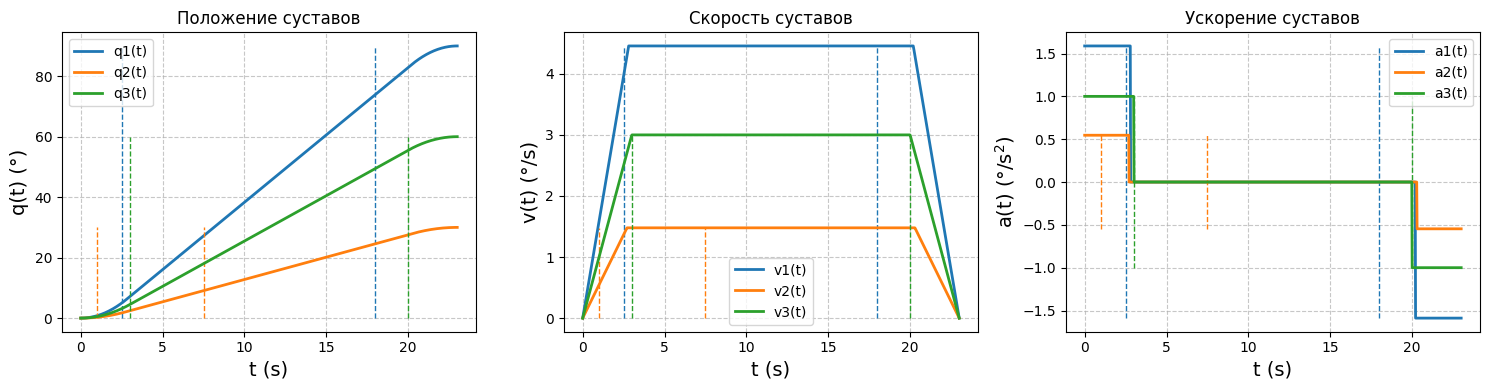

In [20]:
# --- Построение графиков ---
plt.figure(figsize=(15, 4))

# --- Положение ---
plt.subplot(1, 3, 1)
for i, (t, q, v, a) in enumerate(trajectories_sync):
    t0_i, t1_i, T_i, tf_i = time_params_all[i]
    plt.plot(t, np.rad2deg(q), linewidth=2, label=f"q{i+1}(t)", color=colors[i])
    plt.vlines([t1_i, T_i], 0, np.rad2deg(max(q)), linestyles='--', linewidth=1, color=colors[i])
plt.xlabel('t (s)', fontsize=14)
plt.ylabel(r'q(t) (°)', fontsize=14)
plt.title('Положение суставов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# --- Скорость ---
plt.subplot(1, 3, 2)
for i, (t, q, v, a) in enumerate(trajectories_sync):
    t0_i, t1_i, T_i, tf_i = time_params_all[i]
    plt.plot(t, np.rad2deg(v), linewidth=2, label=f"v{i+1}(t)", color=colors[i])
    plt.vlines([t1_i, T_i], 0, np.rad2deg(max(v)), linestyles='--', linewidth=1, color=colors[i])
plt.xlabel('t (s)', fontsize=14)
plt.ylabel(r'v(t) (°/s)', fontsize=14)
plt.title('Скорость суставов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# --- Ускорение ---
plt.subplot(1, 3, 3)
for i, (t, q, v, a) in enumerate(trajectories_sync):
    t0_i, t1_i, T_i, tf_i = time_params_all[i]
    plt.plot(t, np.rad2deg(a), linewidth=2, label=f"a{i+1}(t)", color=colors[i])
    plt.vlines([t1_i, T_i], np.rad2deg(min(a)), np.rad2deg(max(a)), linestyles='--', linewidth=1, color=colors[i])
plt.xlabel('t (s)', fontsize=14)
plt.ylabel(r'a(t) (°/s$^2$)', fontsize=14)
plt.title('Ускорение суставов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

Теперь шарниры синхронизированы

**Задание 4.** Построить траекторию с 4 промежуточными точками. Начальные и конечные значения положения возьмите из задания 3. Выбор промежуточных точек произвольный. Построить графики положения, скорости и ускорения.

Зададим точки и ограничения

In [21]:
t0 = 0.0
q0 = np.deg2rad([0, 0, 0])          # начальные углы (в радианах)
qf = np.deg2rad([90, 30, 60])      # конечные углы (в радианах)
dq0 = [0, 0, 0]                     # начальные скорости
dqf = [0, 0, 0]                     # конечные скорости

q_inter = np.deg2rad([
    [25, 10, 20],
    [60, 20, 30],
    [62, 20, 50],
    [75, 23, 55],
])

waypoints = np.vstack([q0, q_inter, qf])

Запишем сплайн для каждого шарнира и ограничений по скорости на границах

In [ ]:
t_space = np.linspace(0, 5, 6)

A = np.array([
    [1, t_space[0], t_space[0]**2, t_space[0]**3, t_space[0]**4, t_space[0]**5, t_space[0]**6, t_space[0]**7],
    [1, t_space[1], t_space[1]**2, t_space[1]**3, t_space[1]**4, t_space[1]**5, t_space[1]**6, t_space[1]**7],
    [1, t_space[2], t_space[2]**2, t_space[2]**3, t_space[2]**4, t_space[2]**5, t_space[2]**6, t_space[2]**7],
    [1, t_space[3], t_space[3]**2, t_space[3]**3, t_space[3]**4, t_space[3]**5, t_space[3]**6, t_space[3]**7],
    [1, t_space[4], t_space[4]**2, t_space[4]**3, t_space[4]**4, t_space[4]**5, t_space[4]**6, t_space[4]**7],
    [1, t_space[5], t_space[5]**2, t_space[5]**3, t_space[5]**4, t_space[5]**5, t_space[5]**6, t_space[5]**7],
    [0, 1, 2*t_space[0], 3*t_space[0]**2, 4*t_space[0]**3, 5*t_space[0]**4, 6*t_space[0]**5, 7*t_space[0]**6],
    [0, 1, 2*t_space[5], 3*t_space[5]**2, 4*t_space[5]**3, 5*t_space[5]**4, 6*t_space[5]**5, 7*t_space[5]**6],
], dtype=float)

b = np.vstack([
    waypoints,
    dq0,
    dqf
])

coeffs = np.linalg.solve(A,b)

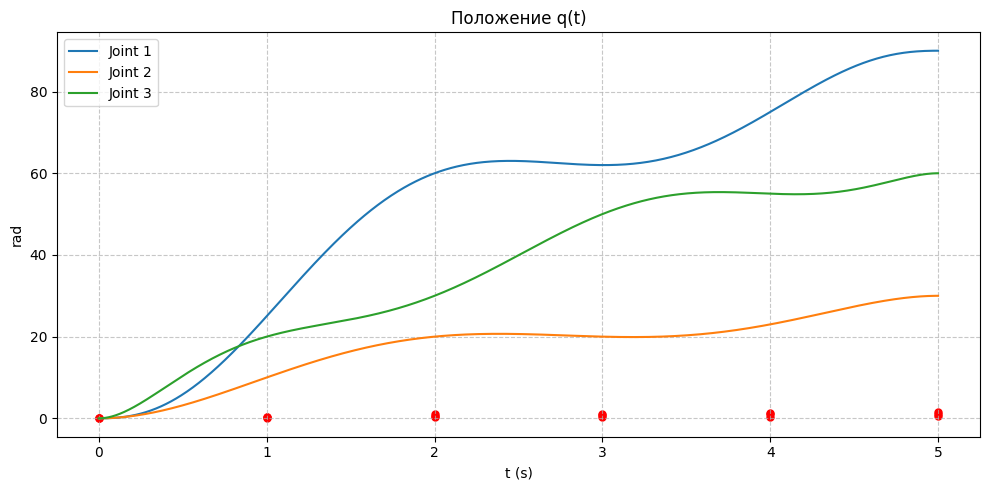

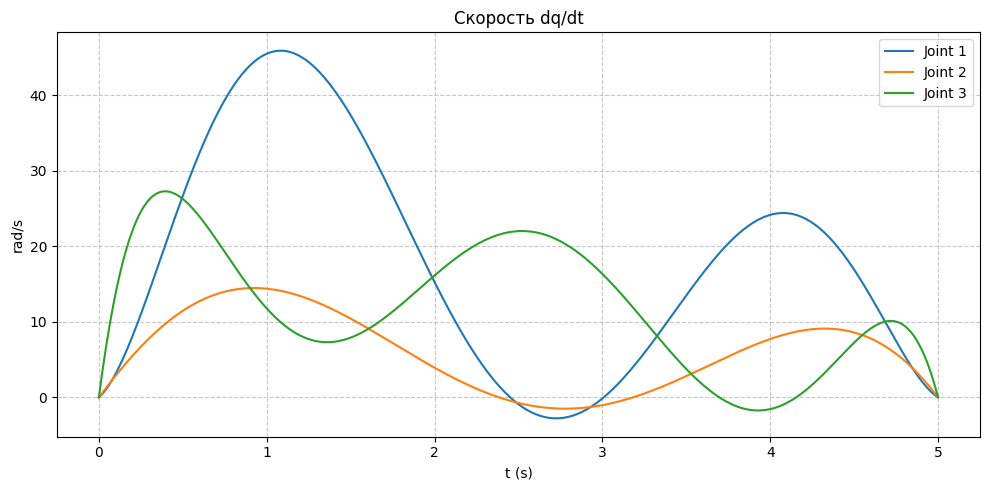

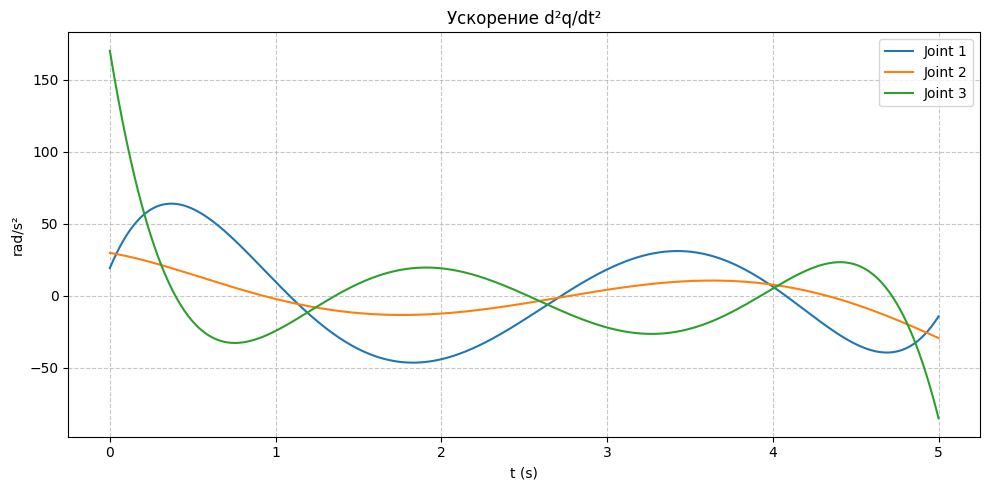

In [ ]:
t = np.linspace(t_space[0], t_space[-1], 1000)
T  = np.vstack([t**k for k in range(8)]).T
Tv = np.vstack([[0*t] + [k*t**(k-1) for k in range(1,8)]]).T
Ta = np.vstack([[0*t, 0*t] + [k*(k-1)*t**(k-2) for k in range(2,8)]]).T

Q  = np.rad2deg(T  @ coeffs)   # положение
Qv = np.rad2deg(Tv @ coeffs)   # скорость
Qa = np.rad2deg(Ta @ coeffs)   # ускорение

# === графики ===
plt.figure(figsize=(10,5))
for j in range(3):
    plt.plot(t, Q[:, j], label=f'Joint {j+1}')
plt.scatter(np.repeat(t_space, 3), waypoints.flatten(), color='r', s=25)
plt.title('Положение q(t)')
plt.xlabel('t (s)'); plt.ylabel('rad'); plt.grid(True, linestyle='--', alpha=0.7); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
for j in range(3):
    plt.plot(t, Qv[:, j], label=f'Joint {j+1}')
plt.title('Скорость dq/dt')
plt.xlabel('t (s)'); plt.ylabel('rad/s'); plt.grid(True, linestyle='--', alpha=0.7); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
for j in range(3):
    plt.plot(t, Qa[:, j], label=f'Joint {j+1}')
plt.title('Ускорение d²q/dt²')
plt.xlabel('t (s)'); plt.ylabel('rad/s²'); plt.grid(True, linestyle='--', alpha=0.7); plt.legend(); plt.tight_layout(); plt.show()

**Задание 5.** Построить траекторию при переходе от точки к точке при заданных начальных и конечныx положениях энд-эффектора $p_0=[0,2,1]$, $p_f=[1.32,1.32,1.5]$. Максимальная линейная скорость - 1 м/с, максимальное линейное ускорение - 1 м/с$^2$. Построить графики положения, скорости и ускорения энд-эффектора (для решения вам потребуется посчитать обратную кинематику, а для вычисления скорости потребуется матрица Якоби). Построить графики положения и скорости всех шарниров.

In [24]:
p0 = np.array([0,2,1.])
pf = np.array([1.32, 1.32, 1.5])

Vmax = 1
amax = 1

Функция для обратной кинематики

In [25]:
def inverse(p, l):
    x, y, z = p
    l1, l2, l3 = l
    rho = np.hypot(x, y)
    zp = z - l1

    theta1 = np.arctan2(y, x)

    c3 = (rho**2 + zp**2 - l2**2 - l3**2) / (2.0 * l2 * l3)

    if c3 < -1.0 - 1e-9 or c3 > 1.0 + 1e-9:
        raise ValueError("Target is unreachable for given l2, l3 (|c3|>1).")
    c3 = np.clip(c3, -1.0, 1.0)

    s3_pos =  np.sqrt(max(0.0, 1.0 - c3**2))

    theta3 = np.arctan2(s3_pos, c3)
    theta2 = np.arctan2(zp, rho) - np.arctan2(l3*s3_pos, l2 + l3*c3)
    sols = np.array([theta1, theta2, theta3])

    return sols

Функции для подсчета траектории при ограничениях в скорости и ускорений

In [ ]:
def calculate_sigma(t, t1, t2, tf, L, Vmax, amax):
    s  = np.zeros_like(t)
    ds = np.zeros_like(t)
    dds = np.zeros_like(t)

    # Участок 1: разгон
    mask1 = t <= t1
    s[mask1]  = 0.5 * amax * t[mask1]**2
    ds[mask1] = amax * t[mask1]
    dds[mask1]= amax

    # Участок 2: равномерная скорость
    mask2 = (t > t1) & (t <= t2)
    s[mask2]  = (Vmax * (t[mask2] - t1/2.0))
    ds[mask2] = Vmax
    dds[mask2]= 0.0

    # Участок 3: торможение
    mask3 = t > t2
    s[mask3]  = L - 0.5 * amax * (tf - t[mask3])**2
    ds[mask3] = amax * (tf - t[mask3])
    dds[mask3]= -amax

    # Обнуление на концах
    ds[0] = 0.0
    ds[-1] = 0.0

    return s, ds, dds

def calculate_p(sigma, ds, dds, p0, pf, L):
    sigma = sigma[:, np.newaxis]
    ds = ds[:, np.newaxis]
    dds = dds[:, np.newaxis]

    p = p0 + (sigma / L) * (pf - p0)
    dp = (pf - p0) / L * ds
    ddp = (pf - p0) / L * dds
    return p, dp, ddp

def Jdot_times_dq(q, dq, l, J_func, eps=1e-8):
    if np.linalg.norm(dq) < 1e-12:
        return np.zeros(3)

    q_f = q + eps * dq
    q_b = q - eps * dq

    J_f = J_func(q_f[0], q_f[1], q_f[2], l[0], l[1], l[2])[:3, :]
    J_b = J_func(q_b[0], q_b[1], q_b[2], l[0], l[1], l[2])[:3, :]

    Jdot = (J_f - J_b) / (2.0 * eps)
    return Jdot @ dq  

def calculate_q(l, p, dp, ddp, J_func, inverse_func, lam=1e-4):
    q = inverse_func(p, l)

    J_full = J_func(q[0], q[1], q[2], l[0], l[1], l[2])
    J = J_full[:3, :]

    JJt = J @ J.T
    J_pinv = J.T @ np.linalg.inv(JJt + lam**2 * np.eye(3))

    dq = J_pinv @ dp

    Jdotdq = Jdot_times_dq(q, dq, l, J_func, eps=1e-8)
    ddq = J_pinv @ (ddp - Jdotdq)

    return q, dq, ddq


def operational_space_path(p0, pf, Vmax, amax, l, J_func, inverse_func):
    delta_p = pf-p0
    L = L = float(np.linalg.norm(delta_p))

    if L <= Vmax**2/amax:
        t1 = np.sqrt(L/amax)
        t2 = t1
        tf = t1+t1
    else:
        t1 = Vmax / amax
        t2 = t1 + (L - Vmax**2 / amax) / Vmax
        tf = t2+t1
    t = np.linspace(0, tf, 500)

    sigma, ds, dds = calculate_sigma(t, t1, t2, tf, L, Vmax, amax)
    p, dp, ddp = calculate_p(sigma, ds, dds, p0, pf, L)

    q_all, dq_all, ddq_all = [], [], []

    for i in range(len(t)):
        qi, dqi, ddqi = calculate_q(l, p[i], dp[i], ddp[i], J_func, inverse_func)
        q_all.append(qi)
        dq_all.append(dqi)
        ddq_all.append(ddqi)

    q = np.array(q_all)
    dq = np.array(dq_all)
    ddq = np.array(ddq_all)

    return t, p, dp, ddp, q, dq, ddq

In [41]:
J_cl_sym, J_cl_num = j_sym_analytic()

In [42]:
t, p, dp, ddp, q, dq, ddq = operational_space_path(p0, pf, Vmax, amax, (params["l1"], params["l2"], params["l3"]), J_cl_num, inverse)

Смотрим ошибку

In [43]:
i_test = len(t)//2
J_full = J_cl_num(q[i_test,0], q[i_test,1], q[i_test,2], params["l1"], params["l2"], params["l3"])
J_pos  = J_full[:3,:]
print("||J dq - dp|| =", np.linalg.norm(J_pos @ dq[i_test] - dp[i_test]))

||J dq - dp|| = 1.1469783255091236e-08


(500, 3)


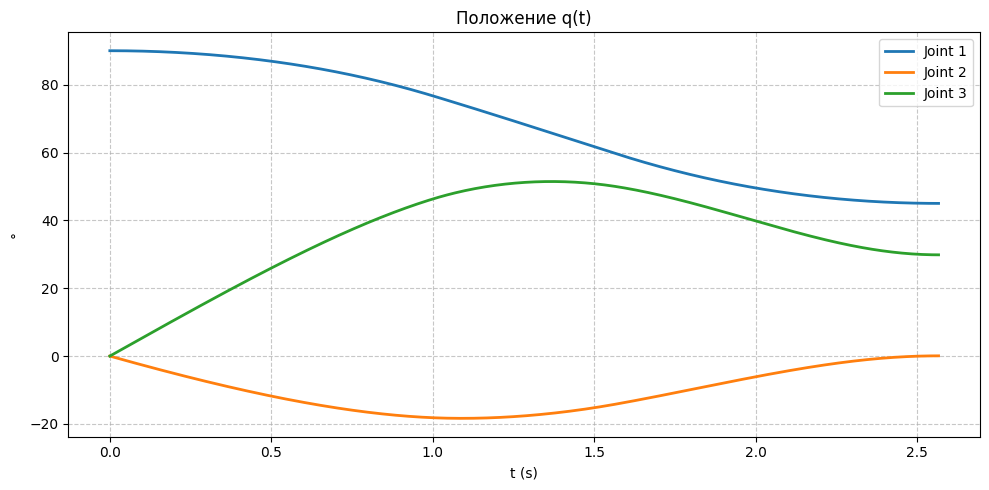

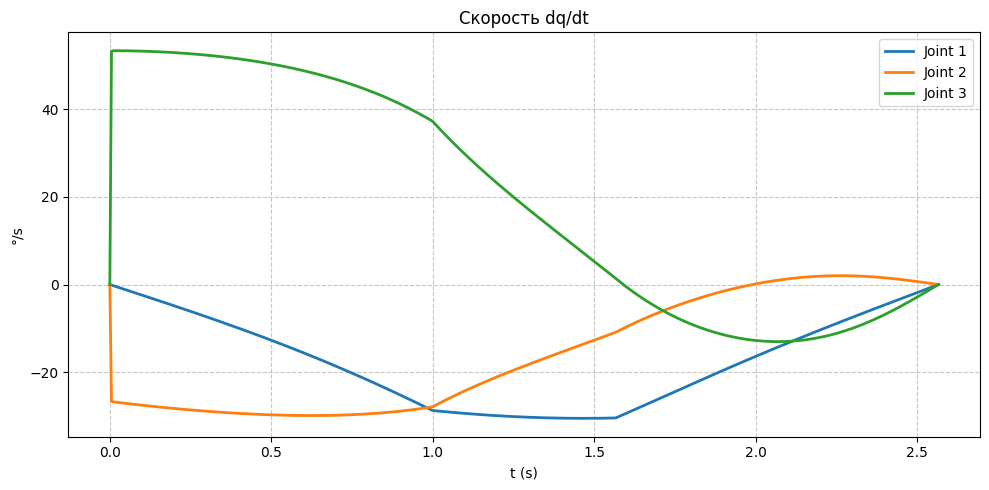

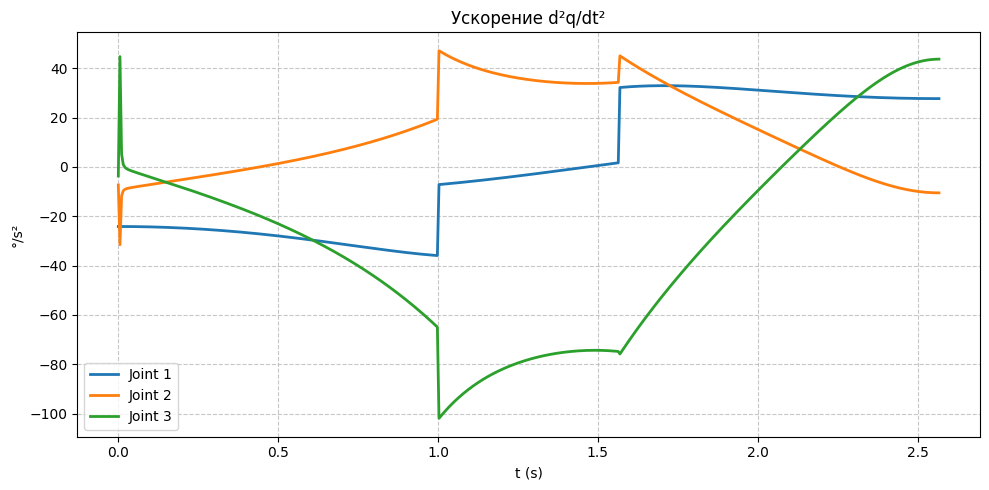

In [ ]:
Q  = np.rad2deg(q)    # положение, ° 
Qv = np.rad2deg(dq)   # скорость, °/s
Qa = np.rad2deg(ddq)  # ускорение, °/s²

# === графики положения ===
plt.figure(figsize=(10,5))
for j in range(Q.shape[1]):
    plt.plot(t, Q[:, j], linewidth=2, label=f'Joint {j+1}')
plt.title('Положение q(t)')
plt.xlabel('t (s)')
plt.ylabel('°')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# === графики скорости ===
plt.figure(figsize=(10,5))
for j in range(Qv.shape[1]):
    plt.plot(t, Qv[:, j], linewidth=2, label=f'Joint {j+1}')
plt.title('Скорость dq/dt')
plt.xlabel('t (s)')
plt.ylabel('°/s')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# === графики ускорения ===
plt.figure(figsize=(10,5))
for j in range(Qa.shape[1]):
    plt.plot(t, Qa[:, j], linewidth=2, label=f'Joint {j+1}')
plt.title('Ускорение d²q/dt²')
plt.xlabel('t (s)')
plt.ylabel('°/s²')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Как мы видим, есть скачки ускорений, их можно было бы скорректировать с помощью добавления линейности рывка

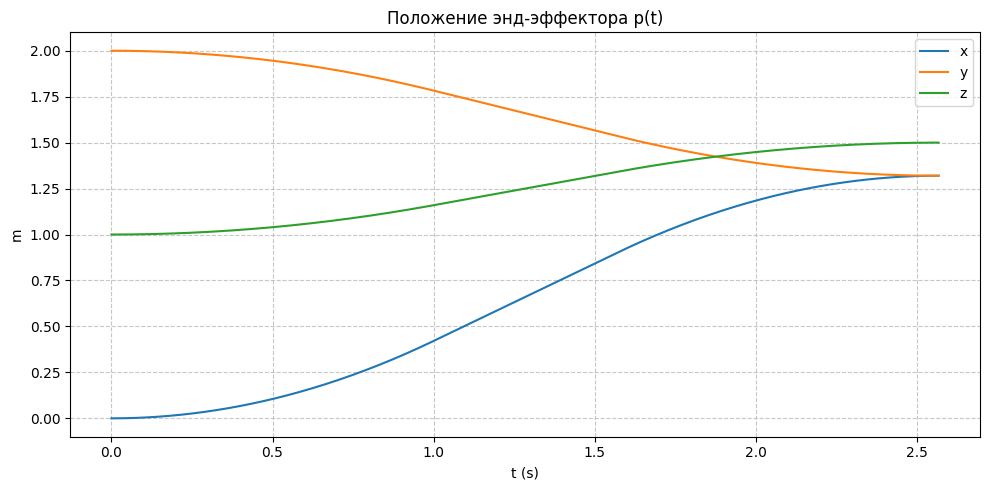

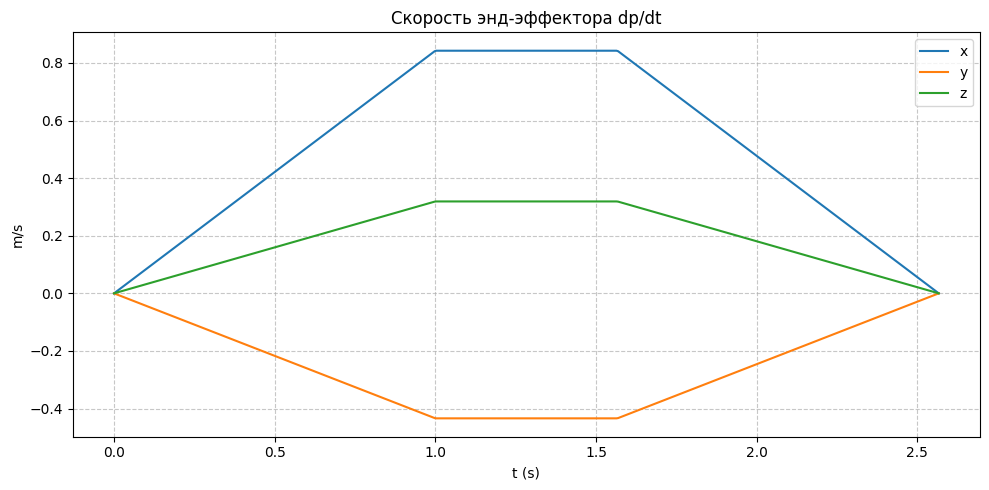

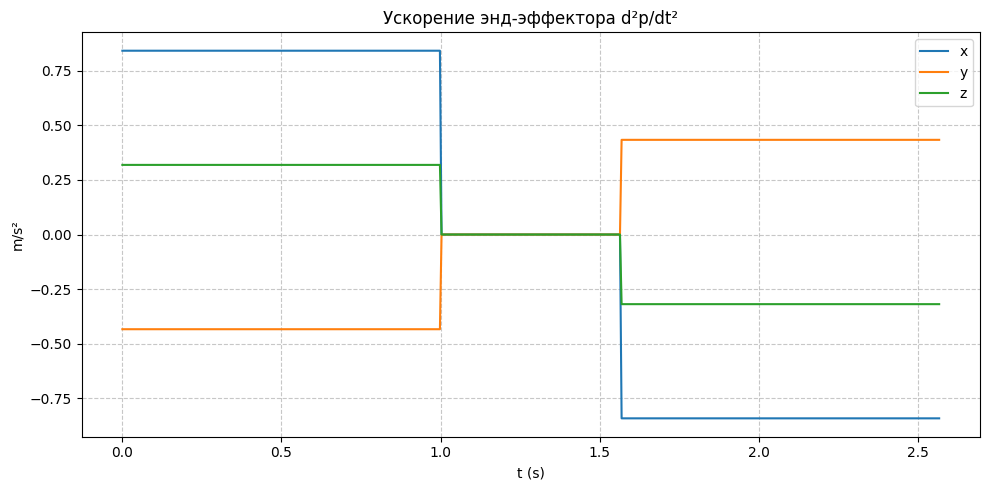

In [45]:
labels = ['x', 'y', 'z']

plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(t, p[:, i], label=labels[i])
plt.title('Положение энд-эффектора p(t)')
plt.xlabel('t (s)'); plt.ylabel('m'); plt.grid(True, linestyle='--', alpha=0.7); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(t, dp[:, i], label=labels[i])
plt.title('Скорость энд-эффектора dp/dt')
plt.xlabel('t (s)'); plt.ylabel('m/s'); plt.grid(True, linestyle='--', alpha=0.7); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(t, ddp[:, i], label=labels[i])
plt.title('Ускорение энд-эффектора d²p/dt²')
plt.xlabel('t (s)'); plt.ylabel('m/s²'); plt.grid(True, linestyle='--', alpha=0.7); plt.legend(); plt.tight_layout(); plt.show()


**Задание 6**. Нарисовать с помощью matplotlib начальную, конечную конфигурации робота и путь, пройденный энд-эффектором, в предыдущем задании.

In [ ]:
def forward_kinematics(q, l):
    q1, q2, q3 = q
    l1, l2, l3 = l

    base = np.array([0, 0, 0])

    joint1 = np.array([0, 0, l1])

    T1 = np.array([
        [np.cos(q1), -np.sin(q1)*np.cos(q2),  np.sin(q1)*np.sin(q2), np.cos(q1)*l2*np.cos(q2)],
        [np.sin(q1),  np.cos(q1)*np.cos(q2), -np.cos(q1)*np.sin(q2), np.sin(q1)*l2*np.cos(q2)],
        [0,           np.sin(q2),             np.cos(q2),             l1 + l2*np.sin(q2)],
        [0, 0, 0, 1]
    ])

    joint2 = T1[:3, 3]

    xe = joint2[0] + l3 * np.cos(q1) * np.cos(q2 + q3)
    ye = joint2[1] + l3 * np.sin(q1) * np.cos(q2 + q3)
    ze = joint2[2] + l3 * np.sin(q2 + q3)

    ee = np.array([xe, ye, ze])

    return np.vstack([base, joint1, joint2, ee])

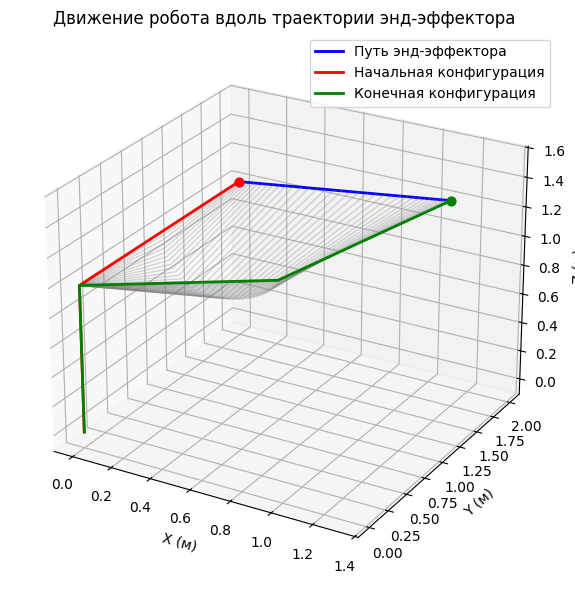

In [51]:
# --- Константы
l = (params["l1"], params["l2"], params["l3"])

# --- Фигуры
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# --- Путь энд-эффектора (из твоих вычислений)
ax.plot(p[:, 0], p[:, 1], p[:, 2], 'b-', linewidth=2, label='Путь энд-эффектора')

# --- Промежуточные конфигурации
for i in range(0, len(q), max(1, len(q)//40)):  # ~40 кадров
    pts = forward_kinematics(q[i], l)
    ax.plot(pts[:, 0], pts[:, 1], pts[:, 2],
            color='gray', alpha=0.3, linewidth=1)

# --- Начальная конфигурация
pts_start = forward_kinematics(q[0], l)
ax.plot(pts_start[:, 0], pts_start[:, 1], pts_start[:, 2],
        'r-', linewidth=2, label='Начальная конфигурация')
ax.scatter(pts_start[-1, 0], pts_start[-1, 1], pts_start[-1, 2],
           color='red', s=40)

# --- Конечная конфигурация
pts_final = forward_kinematics(q[-1], l)
ax.plot(pts_final[:, 0], pts_final[:, 1], pts_final[:, 2],
        'g-', linewidth=2, label='Конечная конфигурация')
ax.scatter(pts_final[-1, 0], pts_final[-1, 1], pts_final[-1, 2],
           color='green', s=40)

# --- Оформление
ax.set_title("Движение робота вдоль траектории энд-эффектора", fontsize=12)
ax.set_xlabel("X (м)")
ax.set_ylabel("Y (м)")
ax.set_zlabel("Z (м)")
ax.legend()
ax.grid(True)
ax.set_box_aspect([1, 1, 0.8])
ax.view_init(elev=25, azim=-60)
plt.tight_layout()
plt.show()

>**Важно!**
>
> Использование готовых библиотек запрещено, весь код должен быть написан с нуля.

> **Требования:**
>
> Вам необходимо отправить рабочий код (Python) и отчет. Можно использовать colab.
> Отчет должен содержать:
>
>- полученная матрица Якоби
- графики положения, скорости и ускорений шарниров для соответствующих пунктов.

>**Срок:**
>
>Работу необходимо отправить до **19.10 23:59**.